In [189]:
# DEVOIR 1 - Codes
# Mesures de similarité avec les cinq algorithmes différents
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse

In [190]:
# Les mesures de similarité (tirée du TP4)

# Distance euclidienne
def l2(x, y):
    return np.sum(abs(x - y) ** 2) ** (1/2)

# Matrice de dissimilarité
def get_dissimilarity_matrix(dist, X, Y=None):
    Y = X if Y is None else Y
    diss_matrix = np.zeros((X.shape[0], Y.shape[0]))
    
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            diss_matrix[i,j] = dist(X[i], Y[j])
            
        if (i + 1) % 100 == 0:
            print(f'Itération {i + 1} terminée!') 
        if (i + 1) == X.shape[0]:
            print(f'Fin du calcul de la matrice')
            
    return diss_matrix

In [191]:
# Entraînement: contient 60 000 données
mnist_train = pd.read_csv('mnist_train.csv')

x_train = mnist_train.drop('label', axis = 1).values
y_train = mnist_train.loc[:, 'label'].values

N = 6000
x_train = x_train[0:N,:]
y_train = y_train[0:N]

# Prétraitement
for i in range(len(x_train)):
    for j in range(len(x_train[0])):
        if x_train[i][j] != 0:
            x_train[i][j] = round(int(x_train[i][j])/255.0)

In [192]:
# Génération de 6 000 données d'entraînement
# Matrice de dissimilarité 6 000 par 6 000
mnist_dissimilarity = get_dissimilarity_matrix(l2, x_train)
print(mnist_dissimilarity.shape)

Itération 100 terminée!
Itération 200 terminée!
Itération 300 terminée!
Itération 400 terminée!
Itération 500 terminée!
Itération 600 terminée!
Itération 700 terminée!
Itération 800 terminée!
Itération 900 terminée!
Itération 1000 terminée!
Itération 1100 terminée!
Itération 1200 terminée!
Itération 1300 terminée!
Itération 1400 terminée!
Itération 1500 terminée!
Itération 1600 terminée!
Itération 1700 terminée!
Itération 1800 terminée!
Itération 1900 terminée!
Itération 2000 terminée!
Itération 2100 terminée!
Itération 2200 terminée!
Itération 2300 terminée!
Itération 2400 terminée!
Itération 2500 terminée!
Itération 2600 terminée!
Itération 2700 terminée!
Itération 2800 terminée!
Itération 2900 terminée!
Itération 3000 terminée!
Itération 3100 terminée!
Itération 3200 terminée!
Itération 3300 terminée!
Itération 3400 terminée!
Itération 3500 terminée!
Itération 3600 terminée!
Itération 3700 terminée!
Itération 3800 terminée!
Itération 3900 terminée!
Itération 4000 terminée!
Itération

In [193]:
# Test: contient 10 000 données
mnist_test = pd.read_csv('mnist_test.csv')

x_test = mnist_test.drop('label', axis = 1).values 
y_test = mnist_test.loc[:, 'label'].values

n = 2000
x_test = x_test[0:n,:]
y_test = y_test[0:n]

# Prétraitement
for i in range(len(x_test)):
    for j in range(len(x_test[0])):
        if x_test[i][j] != 0:
            x_test[i][j] = round(int(x_test[i][j])/255.0)

In [194]:
# Génération de 2 000 données de test
# Matrice de dissimilarité 2 000 par 6 000
mnist_dissimilarity_test = get_dissimilarity_matrix(l2, x_test, x_train)
print(mnist_dissimilarity_test.shape)

Itération 100 terminée!
Itération 200 terminée!
Itération 300 terminée!
Itération 400 terminée!
Itération 500 terminée!
Itération 600 terminée!
Itération 700 terminée!
Itération 800 terminée!
Itération 900 terminée!
Itération 1000 terminée!
Itération 1100 terminée!
Itération 1200 terminée!
Itération 1300 terminée!
Itération 1400 terminée!
Itération 1500 terminée!
Itération 1600 terminée!
Itération 1700 terminée!
Itération 1800 terminée!
Itération 1900 terminée!
Itération 2000 terminée!
Fin du calcul de la matrice
(2000, 6000)


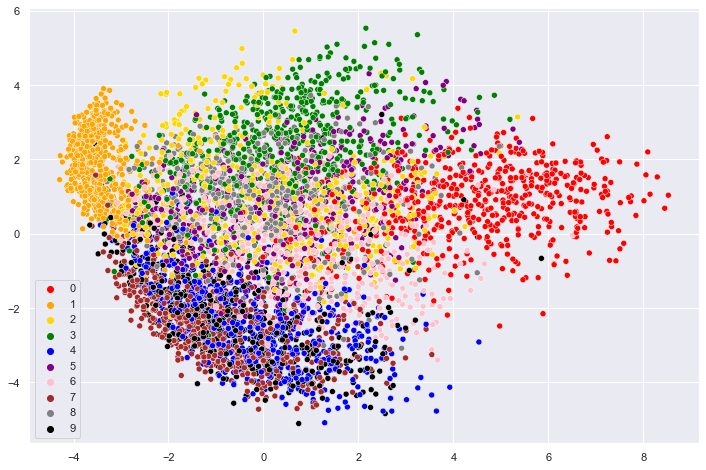

In [215]:
# PCoA
from sklearn.decomposition import KernelPCA

pcoa = KernelPCA(n_components = 2, kernel='precomputed')
pcoa_train = pcoa.fit_transform(-.5*mnist_dissimilarity**2)
pcoa_test = pcoa.transform(-.5*mnist_dissimilarity_test**2)

import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
graph_train = sns.scatterplot(x = pcoa_train[:,0], y = pcoa_train[:, 1], hue = y_train, 
                        palette = ['red', 'orange', 'gold', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black'])

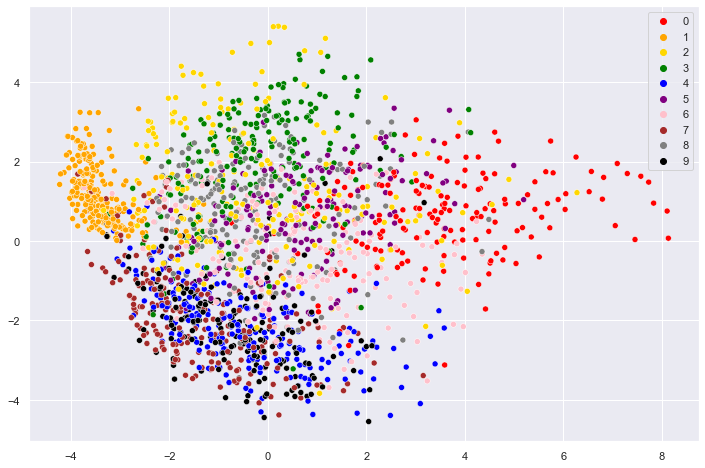

In [203]:
sns.set(rc={'figure.figsize':(12,8)})
graph_test = sns.scatterplot(x = pcoa_test[:,0], y = pcoa_test[:, 1], hue = y_test, 
                        palette = ['red', 'orange', 'gold', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black'])

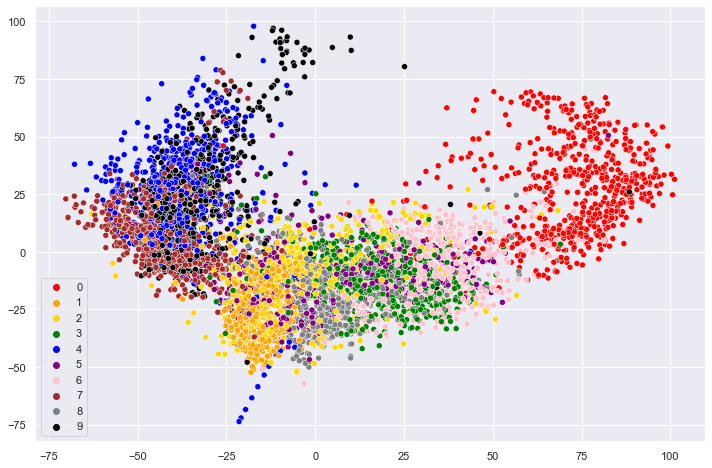

In [218]:
# Isomap
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2, n_neighbors=2, metric='precomputed')
isomap_train = isomap.fit_transform(mnist_dissimilarity)
isomap_test = isomap.transform(mnist_dissimilarity_test)

import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
graph_train = sns.scatterplot(x = isomap_train[:,0], y = isomap_train[:,1], hue = y_train, 
                        palette = ['red', 'orange', 'gold', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black'])

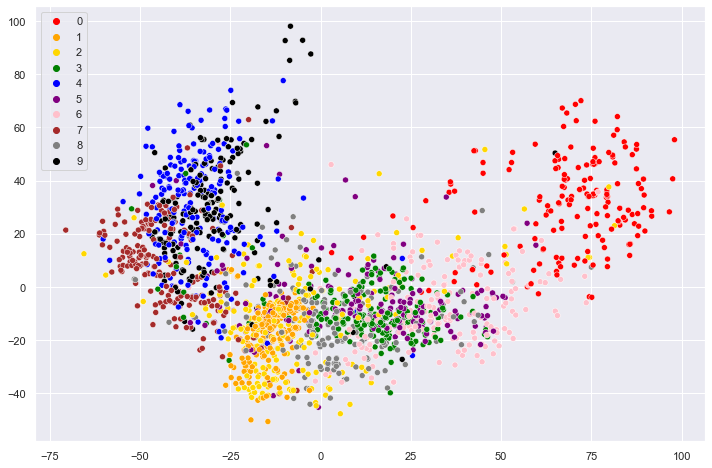

In [226]:
graph_test = sns.scatterplot(x = isomap_test[:,0], y = isomap_test[:,1], hue = y_test, 
                        palette = ['red', 'orange', 'gold', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black'])